In [35]:
beta = np.diff(infectRaw+recovRaw+deadRaw)/infectRaw[:-1] #scaling won't matter here, cancels out

In [37]:
cons = [len(infectRaw)]

def simulate(theta, cons):
    
    return theta
    
def randStart():
    theta = np.ones(6)

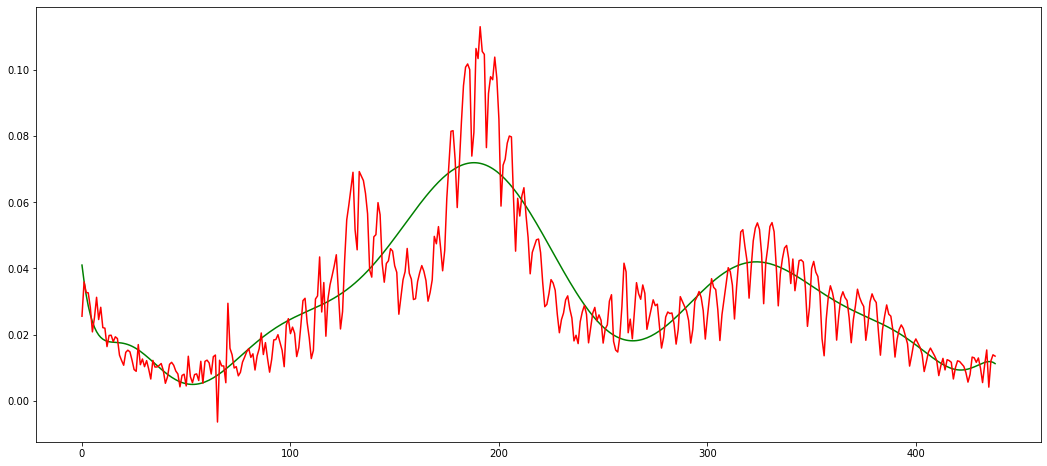

In [53]:
# from scipy.interpolate import lagrange
from numpy.polynomial import legendre
polyCount = 13 #degree of polynomial

timeSeries = np.arange(len(beta))
coef = legendre.legfit(timeSeries, beta, polyCount)

fitSeries = legendre.legval(timeSeries, coef)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(timeSeries, fitSeries, color="green")
ax.plot(timeSeries, beta, color="red")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import Models.OWID as owid
import Models.SIRD as sird
import Models.GradientDescent as gd


def startFunc(consts):
    
    recovRate = consts[0]
    deathRate = consts[1]
    
    params = np.zeros(7)
        
    params[0] = random.random()*.001 #I(0), between 0 and .1 percent of the population
    params[1] = random.random()*.1 #A(0), between 0 and 10 percent of the population
    
    params[2] = .1 + random.random()*10 #alpha0 knowledge rate [.001, 10.1]
    params[3] = .001 + random.random()*.05 #alpha1 knowledge decay rate [.001, .051]

    params[4] = (recovRate+deathRate) * random.random() #beta0, floor infection rate
    #theta[4] = 0
    params[5] = (recovRate+deathRate - params[4]) * (.5*random.random() + 1.1) #beta1, ceiling infectRate
    params[6] = .5 + random.random()*5 #beta2, exponential [.5, 5.5]
    
    return params
    
def simFunc(params, consts):
    
    recovRate = consts[0]
    deathRate = consts[1]
    dayNum = consts[2]
    
    I = np.zeros((dayNum))
    K = np.zeros((dayNum))

    I[0] = params[0] # I(0)
    K[0] = params[1]
    alpha0 = params[2]
    alpha1 = params[3]
    beta = params[4:] #beta0, beta1, beta2
    

    #iterate the arrays using the definition K' and I'
    for t in range(len(I)-1): #define I and K on range [1, length)
        diffI = (beta[0] + (beta[1] / (1 + (K[t])**beta[2] )) )*I[t] - (recovRate + deathRate)*I[t]
        diffK = alpha0*I[t] - alpha1*K[t]

        I[t+1] = diffI + I[t]
        K[t+1] = diffK + K[t]

    return I #I is the data generated

def constrainFunc(parameters, consts):
    
    params = np.copy(parameters)
    
    recovRate = consts[0]
    deathRate = consts[1]
    
    #fill the constraints
    paramConstraints = np.zeros((len(params),2)) #min, max for each one
    
    paramConstraints[0] = [.0000000001, .005] #I(t)
    paramConstraints[1] = [ 0.000000001, 10e10] #K(t), no real ceiling

    paramConstraints[2] = [0.00001, 10e10] #alpha0
    paramConstraints[3] = [0.00001, 1] #alpha1

    paramConstraints[4] = [0.0000001, recovRate + deathRate] #beta0 < recoveries
    paramConstraints[5] = [recovRate + deathRate - params[4], 5] #beta1, beta1+beta2 ceiling
    paramConstraints[6] = [.25, 10] #beta2
    
    for i in range(len(params)): #exercise each constraint
        params[i] = min( max(paramConstraints[i,0], params[i]) , paramConstraints[i,1])
    
    return params
    

## US Fit

In [65]:
dates, I, R, D, V = owid.LoadCountryNormal("United States") 

gradDesc.eta = .1

gradDesc = gd.GradDescent(I, [sird.getGamma(I,R), sird.getNu(I,D), len(I)], startFunc, simFunc, constrainFunc)
gradDesc.solveVars(printOut=100)

Startin Vars:
Error: 0.013043001303301043
[3.11568165e-04 4.09840955e-03 3.75335382e+00 3.46613690e-02
 2.49565429e-02 6.36218941e-02 2.16277564e+00]
Iteration: 100 Error: 0.008120728867932216 , improvement: 0.0006451731210974604
Iteration: 200 Error: 0.007787853852686199 , improvement: 0.0002989602649335059
Iteration: 300 Error: 0.007600566063695441 , improvement: 0.000200258871061202
Iteration: 400 Error: 0.007472835010662007 , improvement: 0.00014338489766061469
Iteration: 500 Error: 0.007381480774214761 , improvement: 0.00010535803839276307
Iteration: 600 Error: 0.007314416602289712 , improvement: 7.902349017361706e-05
Iteration: 700 Error: 0.007263957730377361 , improvement: 6.0720214547875486e-05
Iteration: 800 Error: 0.007224871476130165 , improvement: 4.8104467062912935e-05
Iteration: 900 Error: 0.00719351672587775 , improvement: 3.952701413598853e-05
Iteration: 1000 Error: 0.00716735349994467 , improvement: 3.3797046415166546e-05
Iteration: 1100 Error: 0.0071446178540146765 , 

Iteration: 10000 Error: 0.00513803200180289 , improvement: 4.223973476738482e-05
Iteration: 10100 Error: 0.005116435460012094 , improvement: 4.199878497379427e-05
Iteration: 10200 Error: 0.00509505989685645 , improvement: 4.1728637817872225e-05
Iteration: 10300 Error: 0.005073918591999676 , improvement: 4.1427428019631885e-05
Iteration: 10400 Error: 0.0050530255376354995 , improvement: 4.109330695489866e-05
Iteration: 10500 Error: 0.00503239540982833 , improvement: 4.072447454722504e-05
Iteration: 10600 Error: 0.00501204352439936 , improvement: 4.0319214911827387e-05
Iteration: 10700 Error: 0.004991985776135871 , improvement: 3.987593527910047e-05
Iteration: 10800 Error: 0.004972238560352385 , improvement: 3.939320773947809e-05
Iteration: 10900 Error: 0.004952818676162207 , improvement: 3.886981301862491e-05
Iteration: 11000 Error: 0.004933743211228609 , improvement: 3.8304785363456375e-05
Iteration: 11100 Error: 0.004915029408252422 , improvement: 3.7697457322819115e-05
Iteration: 112

Iteration: 20000 Error: 0.004433759809800719 , improvement: 3.1922506245000763e-06
Iteration: 20100 Error: 0.004432351689116608 , improvement: 3.1608982761822135e-06
Iteration: 20200 Error: 0.004430957876207765 , improvement: 3.1296868975782127e-06
Iteration: 20300 Error: 0.004429578295370045 , improvement: 3.098616798414791e-06
Iteration: 20400 Error: 0.004428212870822101 , improvement: 3.0676889574089966e-06
Iteration: 20500 Error: 0.004426861526438097 , improvement: 3.0369048943663365e-06
Iteration: 20600 Error: 0.004425524185534652 , improvement: 3.0062665464751617e-06
Iteration: 20700 Error: 0.004424200770704225 , improvement: 2.9757761803867526e-06
Iteration: 20800 Error: 0.0044228912036882876 , improvement: 2.945436309774105e-06
Iteration: 20900 Error: 0.004421595405284417 , improvement: 2.915249626042957e-06
Iteration: 21000 Error: 0.004420313295282266 , improvement: 2.8852189216291658e-06
Iteration: 21100 Error: 0.004419044792423638 , improvement: 2.855347077321545e-06
Iterati

Iteration: 30000 Error: 0.004349666587374251 , improvement: 9.461338250983095e-07
Iteration: 30100 Error: 0.004349258072447856 , improvement: 9.324873432123393e-07
Iteration: 30200 Error: 0.004348855499193915 , improvement: 9.189834410428534e-07
Iteration: 30300 Error: 0.0043484588042185775 , improvement: 9.056209842980142e-07
Iteration: 30400 Error: 0.004348067924664206 , improvement: 8.923988527848641e-07
Iteration: 30500 Error: 0.004347682798206806 , improvement: 8.793159250985027e-07
Iteration: 30600 Error: 0.004347303363053458 , improvement: 8.663710804607815e-07
Iteration: 30700 Error: 0.0043469295579395655 , improvement: 8.535632105360875e-07
Iteration: 30800 Error: 0.00434656132212625 , improvement: 8.408912017189385e-07
Iteration: 30900 Error: 0.004346198595397568 , improvement: 8.283539505401123e-07
Iteration: 31000 Error: 0.004345841318057787 , improvement: 8.159503549302005e-07
Iteration: 31100 Error: 0.004345489430928558 , improvement: 8.036793198493607e-07
Iteration: 3120

Iteration: 40000 Error: 0.004329861704978362 , improvement: 1.2400773498036075e-07
Iteration: 40100 Error: 0.004329808922121679 , improvement: 1.1985313339868037e-07
Iteration: 40200 Error: 0.004329757926538703 , improvement: 1.1575428440008496e-07
Iteration: 40300 Error: 0.004329708694155119 , improvement: 1.1171059987775289e-07
Iteration: 40400 Error: 0.0043296612011531664 , improvement: 1.0772150228369314e-07
Iteration: 40500 Error: 0.00432961542396944 , improvement: 1.037864102120316e-07
Iteration: 40600 Error: 0.004329571339292576 , improvement: 9.990474842201407e-08
Iteration: 40700 Error: 0.00432952892406094 , improvement: 9.607595645914544e-08
Iteration: 40800 Error: 0.004329488155460487 , improvement: 9.229946862830294e-08
Iteration: 40900 Error: 0.0043294490109224695 , improvement: 8.85747234155366e-08
Iteration: 41000 Error: 0.004329411468121237 , improvement: 8.490116850275514e-08
Iteration: 41100 Error: 0.0043293755049720155 , improvement: 8.127826237668896e-08
Iteration: 

array([1.93179098e-04, 3.91947306e-03, 3.75353258e+00, 1.55553481e-02,
       3.90697627e-02, 1.01950982e-01, 2.16322926e+00])

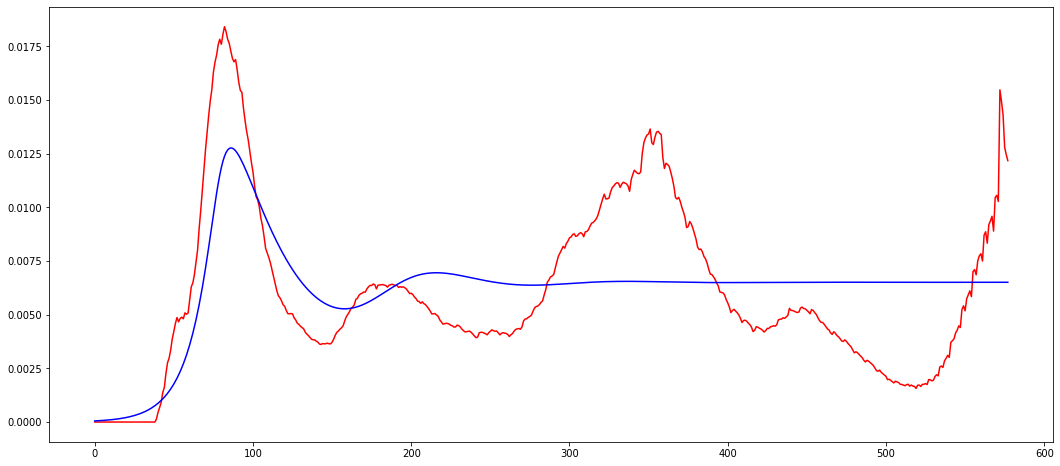

In [64]:
fig, ax = plt.subplots(figsize=(18,8))

gradDesc.x = gradDesc.simulate(gradDesc.params) #to ensure sim data is set if solve vars func was broken
ukVars = gradDesc.params

ax.plot(gradDesc.y, color="red")
ax.plot(gradDesc.x, color="blue")

## UK Fit

In [39]:
dates, I, R, D, V = owid.LoadCountryNormal("United Kingdom")


print(len(I))
gradDesc = gd.GradDescent(I, [sird.getGamma(I,R), sird.getNu(I,D), len(I)], startFunc, simFunc, constrainFunc)
gradDesc.solveVars(printOut=100)

569
Startin Vars:
Error: 0.17828055270773283
[2.74612600e-05 2.74759225e-04 1.76518578e+00 2.51699694e-02
 5.01557414e-02 3.39935544e-02 4.77039967e+00]
Iteration: 2 Error: 0.16347822422527325 , improvement: 0.08582615662559433
Iteration: 3 Error: 0.15178441862768377 , improvement: 0.07153127367884421
Iteration: 4 Error: 0.14806208341467997 , improvement: 0.024523829564709287
Iteration: 5 Error: 0.14728640630914835 , improvement: 0.005238863911965643
Iteration: 8 Error: 0.14717898173624347 , improvement: 0.0011937547029066626
Iteration: 9 Error: 0.14673595051892305 , improvement: 0.003010152754789196
Iteration: 10 Error: 0.14605111380165503 , improvement: 0.004667136545925741
Iteration: 11 Error: 0.14516527953995825 , improvement: 0.006065234551376213
Iteration: 12 Error: 0.1441172465983086 , improvement: 0.007219584083542301
Iteration: 13 Error: 0.1429396705015649 , improvement: 0.008170958886176293
Iteration: 14 Error: 0.1416592360451234 , improvement: 0.00895786629386049
Iteration: 

Iteration: 110 Error: 0.10267533030681948 , improvement: 0.0016797904311406818
Iteration: 111 Error: 0.10250445498203828 , improvement: 0.0016642296087150121
Iteration: 112 Error: 0.10233545900358819 , improvement: 0.0016486695966502422
Iteration: 113 Error: 0.10216833308738857 , improvement: 0.0016331183523959208
Iteration: 114 Error: 0.10200306727622814 , improvement: 0.0016175835130741534
Iteration: 115 Error: 0.10183965097738876 , improvement: 0.0016020724003999397
Iteration: 116 Error: 0.10167807299923162 , improvement: 0.0015865920258604335
Iteration: 117 Error: 0.1015183215867468 , improvement: 0.0015711490960890943
Iteration: 118 Error: 0.10136038445606387 , improvement: 0.0015557500184631918
Iteration: 119 Error: 0.10120424882792717 , improvement: 0.0015404009068688605
Iteration: 120 Error: 0.10104990146013769 , improvement: 0.001525107587645931
Iteration: 121 Error: 0.10089732867896706 , improvement: 0.001509875605676062
Iteration: 122 Error: 0.10074651640955204 , improvement

Iteration: 215 Error: 0.09199151245110312 , improvement: 0.0007689682708145796
Iteration: 216 Error: 0.09192066050062808 , improvement: 0.0007702009521009135
Iteration: 217 Error: 0.09184974998211823 , improvement: 0.0007714317774007837
Iteration: 218 Error: 0.09177878193016052 , improvement: 0.0007726537303751293
Iteration: 219 Error: 0.09170775798271891 , improvement: 0.0007738602098212706
Iteration: 220 Error: 0.09163668033915633 , improvement: 0.0007750450466357991
Iteration: 221 Error: 0.09156555171729433 , improvement: 0.0007762025162712365
Iteration: 222 Error: 0.09149437530992041 , improvement: 0.0007773273467916554
Iteration: 223 Error: 0.09142315474113608 , improvement: 0.00077841472268748
Iteration: 224 Error: 0.09135189402292213 , improvement: 0.0007794602846043143
Iteration: 225 Error: 0.0912805975122629 , improvement: 0.0007804601253404983
Iteration: 226 Error: 0.09120926986914613 , improvement: 0.0007814107823647376
Iteration: 227 Error: 0.09113791601572294 , improvement

Iteration: 324 Error: 0.08473319532157 , improvement: 0.0006688741875094684
Iteration: 325 Error: 0.08467673752581915 , improvement: 0.0006663007990739358
Iteration: 326 Error: 0.08462053686933294 , improvement: 0.0006637083351148533
Iteration: 327 Error: 0.08456459445267454 , improvement: 0.0006610973970157536
Iteration: 328 Error: 0.08450891132286462 , improvement: 0.0006584685963472555
Iteration: 329 Error: 0.08445348847280716 , improvement: 0.0006558225539755506
Iteration: 330 Error: 0.08439832684078956 , improvement: 0.0006531598991954513
Iteration: 331 Error: 0.08434342731005477 , improvement: 0.0006504812688804839
Iteration: 332 Error: 0.0842887907084414 , improvement: 0.0006477873066803117
Iteration: 333 Error: 0.08423441780809053 , improvement: 0.0006450786622263023
Iteration: 334 Error: 0.08418030932521317 , improvement: 0.0006423559904056612
Iteration: 335 Error: 0.08412646591992216 , improvement: 0.0006396199505871869
Iteration: 336 Error: 0.08407288819611473 , improvement:

Iteration: 428 Error: 0.08020490914619358 , improvement: 0.00040806806659163605
Iteration: 429 Error: 0.08017231129481808 , improvement: 0.0004064321214562495
Iteration: 430 Error: 0.08013985596331202 , improvement: 0.0004048197062288902
Iteration: 431 Error: 0.08010754110912958 , improvement: 0.00040323074946918227
Iteration: 432 Error: 0.08007536469983523 , improvement: 0.00040166517220299665
Iteration: 433 Error: 0.08004332471364521 , improvement: 0.00040012288810820817
Iteration: 434 Error: 0.08001141913994951 , improvement: 0.0003986038037505676
Iteration: 435 Error: 0.07997964597981636 , improvement: 0.0003971078187924716
Iteration: 436 Error: 0.0799480032464787 , improvement: 0.00039563482621113674
Iteration: 437 Error: 0.07991648896580385 , improvement: 0.0003941847125024073
Iteration: 438 Error: 0.07988510117674395 , improvement: 0.0003927573579130257
Iteration: 439 Error: 0.07985383793176991 , improvement: 0.00039135263664341407
Iteration: 440 Error: 0.07982269729728833 , imp

Iteration: 533 Error: 0.07725311264396809 , improvement: 0.0003332689250046333
Iteration: 534 Error: 0.07722737633993153 , improvement: 0.0003331426159508633
Iteration: 535 Error: 0.07720165796770646 , improvement: 0.00033302144192830983
Iteration: 536 Error: 0.07717595712760426 , improvement: 0.0003329052869946178
Iteration: 537 Error: 0.07715027342925937 , improvement: 0.00033279403716922394
Iteration: 538 Error: 0.07712460649146267 , improvement: 0.0003326875804300237
Iteration: 539 Error: 0.07709895594199499 , improvement: 0.0003325858067168374
Iteration: 540 Error: 0.07707332141746408 , improvement: 0.0003324886078898566
Iteration: 541 Error: 0.0770477025631439 , improvement: 0.0003323958777047099
Iteration: 542 Error: 0.07702209903281236 , improvement: 0.00033230751183733765
Iteration: 543 Error: 0.07699651048859539 , improvement: 0.0003322234078049349
Iteration: 544 Error: 0.07697093660080848 , improvement: 0.0003321434650042011
Iteration: 545 Error: 0.07694537704780384 , improv

Iteration: 639 Error: 0.07458025971321931 , improvement: 0.0003338985432232315
Iteration: 640 Error: 0.07455535330805642 , improvement: 0.00033395439032615483
Iteration: 641 Error: 0.07453045105027281 , improvement: 0.0003340103249288243
Iteration: 642 Error: 0.07450555293547602 , improvement: 0.0003340663372612362
Iteration: 643 Error: 0.07448065895998707 , improvement: 0.00033412241783522455
Iteration: 644 Error: 0.07445576912081918 , improvement: 0.00033417855743273677
Iteration: 645 Error: 0.07443088341565599 , improvement: 0.00033423474711290706
Iteration: 646 Error: 0.07440600184283205 , improvement: 0.0003342909781814829
Iteration: 647 Error: 0.07438112440131223 , improvement: 0.00033434724220736726
Iteration: 648 Error: 0.07435625109067166 , improvement: 0.00033440353101363865
Iteration: 649 Error: 0.0743313819110792 , improvement: 0.0003344598366334618
Iteration: 650 Error: 0.07430651686327631 , improvement: 0.0003345161513697002
Iteration: 651 Error: 0.07428165594855962 , imp

Iteration: 746 Error: 0.07194004399912256 , improvement: 0.0003393549740604186
Iteration: 747 Error: 0.07191562778894749 , improvement: 0.00033939665334884866
Iteration: 748 Error: 0.07189121688233467 , improvement: 0.00033943813553925106
Iteration: 749 Error: 0.07186681129367158 , improvement: 0.00033947942073425425
Iteration: 750 Error: 0.07184241103731873 , improvement: 0.00033952050903082314
Iteration: 751 Error: 0.07181801612760866 , improvement: 0.00033956140054091716
Iteration: 752 Error: 0.07179362657884507 , improvement: 0.0003396020953886225
Iteration: 753 Error: 0.07176924240530307 , improvement: 0.00033964259369490636
Iteration: 754 Error: 0.07174486362122774 , improvement: 0.0003396828956010082
Iteration: 755 Error: 0.07172049024083403 , improvement: 0.000339723001250492
Iteration: 756 Error: 0.07169612227830642 , improvement: 0.00033976291079138
Iteration: 757 Error: 0.07167175974779812 , improvement: 0.0003398026243837107
Iteration: 758 Error: 0.07164740266343088 , impro

Iteration: 852 Error: 0.06938405232680653 , improvement: 0.00034271329929170435
Iteration: 853 Error: 0.06936027197105238 , improvement: 0.0003427351813085418
Iteration: 854 Error: 0.06933649826020619 , improvement: 0.0003427568861914811
Iteration: 855 Error: 0.06931273120529628 , improvement: 0.00034277841405706524
Iteration: 856 Error: 0.06928897081732728 , improvement: 0.0003427997650045891
Iteration: 857 Error: 0.06926521710727919 , improvement: 0.00034282093914650804
Iteration: 858 Error: 0.0692414700861086 , improvement: 0.00034284193657841116
Iteration: 859 Error: 0.0692177297647481 , improvement: 0.00034286275740504264
Iteration: 860 Error: 0.06919399615410662 , improvement: 0.0003428834017258844
Iteration: 861 Error: 0.06917026926507008 , improvement: 0.0003429038696319369
Iteration: 862 Error: 0.06914654910850095 , improvement: 0.0003429241612207489
Iteration: 863 Error: 0.069122835695239 , improvement: 0.00034294427657897015
Iteration: 864 Error: 0.06909912903610045 , improv

Iteration: 956 Error: 0.06694839688176356 , improvement: 0.0003440512213293197
Iteration: 957 Error: 0.06692536295594512 , improvement: 0.00034405492724674596
Iteration: 958 Error: 0.06690233671875065 , improvement: 0.00034405845822047004
Iteration: 959 Error: 0.06687931817940376 , improvement: 0.00034406181421814023
Iteration: 960 Error: 0.06685630734711581 , improvement: 0.00034406499519364417
Iteration: 961 Error: 0.06683330423108517 , improvement: 0.00034406800111178216
Iteration: 962 Error: 0.06681030884049693 , improvement: 0.0003440708319422681
Iteration: 963 Error: 0.0667873211845245 , improvement: 0.0003440734876306592
Iteration: 964 Error: 0.06676434127232793 , improvement: 0.0003440759681479683
Iteration: 965 Error: 0.06674136911305496 , improvement: 0.0003440782734493522
Iteration: 966 Error: 0.06671840471584041 , improvement: 0.00034408040349986283
Iteration: 967 Error: 0.06669544808980729 , improvement: 0.0003440823582472193
Iteration: 968 Error: 0.06667249924406521 , imp

Iteration: 1059 Error: 0.06461786796428073 , improvement: 0.00034350618176140073
Iteration: 1060 Error: 0.06459567226705026 , improvement: 0.0003434916367519229
Iteration: 1061 Error: 0.06457348514498346 , improvement: 0.0003434769124328074
Iteration: 1062 Error: 0.06455130660606195 , improvement: 0.0003434620087750574
Iteration: 1063 Error: 0.06452913665825463 , improvement: 0.00034344692575501206
Iteration: 1064 Error: 0.06450697530951795 , improvement: 0.0003434316633438202
Iteration: 1065 Error: 0.06448482256779554 , improvement: 0.00034341622151883174
Iteration: 1066 Error: 0.0644626784410186 , improvement: 0.00034340060025220444
Iteration: 1067 Error: 0.06444054293710536 , improvement: 0.0003433847995240259
Iteration: 1068 Error: 0.06441841606396159 , improvement: 0.00034336881930617806
Iteration: 1069 Error: 0.06439629782947996 , improvement: 0.0003433526595821403
Iteration: 1070 Error: 0.06437418824154091 , improvement: 0.0003433363203207218
Iteration: 1071 Error: 0.06435208730

Iteration: 1166 Error: 0.06229307327488855 , improvement: 0.0003409319272704032
Iteration: 1167 Error: 0.06227183767721039 , improvement: 0.0003408982180803529
Iteration: 1168 Error: 0.062250611428848045 , improvement: 0.00034086433216201574
Iteration: 1169 Error: 0.06222939453617127 , improvement: 0.0003408302696115358
Iteration: 1170 Error: 0.062208187005531386 , improvement: 0.00034079603052468216
Iteration: 1171 Error: 0.06218698884326146 , improvement: 0.00034076161499517466
Iteration: 1172 Error: 0.06216580005567594 , improvement: 0.0003407270231224906
Iteration: 1173 Error: 0.062144620649070566 , improvement: 0.0003406922550085275
Iteration: 1174 Error: 0.06212345062972256 , improvement: 0.0003406573107518019
Iteration: 1175 Error: 0.06210229000389032 , improvement: 0.0003406221904569362
Iteration: 1176 Error: 0.06208113877781339 , improvement: 0.00034058689422897275
Iteration: 1177 Error: 0.06205999695771245 , improvement: 0.00034055142217359786
Iteration: 1178 Error: 0.0620388

Iteration: 1270 Error: 0.06013571425009028 , improvement: 0.0003365046741734022
Iteration: 1271 Error: 0.06011548138389664 , improvement: 0.00033645341118749986
Iteration: 1272 Error: 0.060095258416263286 , improvement: 0.00033640199109796835
Iteration: 1273 Error: 0.06007504535120284 , improvement: 0.0003363504142113484
Iteration: 1274 Error: 0.06005484219270083 , improvement: 0.0003362986808232519
Iteration: 1275 Error: 0.06003464894471535 , improvement: 0.0003362467912360176
Iteration: 1276 Error: 0.060014465611176696 , improvement: 0.0003361947457582611
Iteration: 1277 Error: 0.059994292195987446 , improvement: 0.00033614254469829693
Iteration: 1278 Error: 0.05997412870302241 , improvement: 0.0003360901883659873
Iteration: 1279 Error: 0.05995397513612899 , improvement: 0.0003360376770660341
Iteration: 1280 Error: 0.059933831499125886 , improvement: 0.0003359850111250503
Iteration: 1281 Error: 0.05991369779580401 , improvement: 0.0003359321908557125
Iteration: 1282 Error: 0.05989357

Iteration: 1376 Error: 0.05804696865570919 , improvement: 0.00033021976515237183
Iteration: 1377 Error: 0.058027804223004666 , improvement: 0.0003301538934478389
Iteration: 1378 Error: 0.058008649946664 , improvement: 0.0003300879052230699
Iteration: 1379 Error: 0.0579895058268529 , improvement: 0.0003300218127589472
Iteration: 1380 Error: 0.057970371863123475 , improvement: 0.00032995562656729685
Iteration: 1381 Error: 0.057951248054570074 , improvement: 0.00032988935448878586
Iteration: 1382 Error: 0.057932134400016294 , improvement: 0.0003298230011505865
Iteration: 1383 Error: 0.05791303089821113 , improvement: 0.0003297565678015304
Iteration: 1384 Error: 0.05789393754801155 , improvement: 0.0003296900525398896
Iteration: 1385 Error: 0.057874854348532796 , improvement: 0.00032962345086530513
Iteration: 1386 Error: 0.057855781299255025 , improvement: 0.00032955675642671033
Iteration: 1387 Error: 0.057836718400076106 , improvement: 0.0003294899619506915
Iteration: 1388 Error: 0.057817

Iteration: 1478 Error: 0.05614441374349061 , improvement: 0.0003230427264996692
Iteration: 1479 Error: 0.056126280845261174 , improvement: 0.0003229688765168503
Iteration: 1480 Error: 0.05610815795070239 , improvement: 0.00032289498405832317
Iteration: 1481 Error: 0.0560900450562439 , improvement: 0.0003228210499157972
Iteration: 1482 Error: 0.056071942158270084 , improvement: 0.0003227470749161773
Iteration: 1483 Error: 0.05605384925311734 , improvement: 0.00032267305993561386
Iteration: 1484 Error: 0.05603576633707505 , improvement: 0.00032259900583522506
Iteration: 1485 Error: 0.056017693406383094 , improvement: 0.00032252491352112293
Iteration: 1486 Error: 0.05599963045723398 , improvement: 0.00032245078386348704
Iteration: 1487 Error: 0.05598157748577309 , improvement: 0.00032237661772920506
Iteration: 1488 Error: 0.05596353448810006 , improvement: 0.0003223024159620319
Iteration: 1489 Error: 0.055945501460271156 , improvement: 0.00032222817936456414
Iteration: 1490 Error: 0.05592

Iteration: 1580 Error: 0.054345586040423624 , improvement: 0.0003154349028131207
Iteration: 1581 Error: 0.05432844755825369 , improvement: 0.0003153610701186985
Iteration: 1582 Error: 0.05431131848965452 , improvement: 0.0003152872826119141
Iteration: 1583 Error: 0.0542941988266269 , improvement: 0.00031521354118631625
Iteration: 1584 Error: 0.05427708856112993 , improvement: 0.0003151398467377544
Iteration: 1585 Error: 0.05425998768508157 , improvement: 0.000315066200153642
Iteration: 1586 Error: 0.054242896190358034 , improvement: 0.00031499260233403936
Iteration: 1587 Error: 0.05422581406879453 , improvement: 0.00031491905416621826
Iteration: 1588 Error: 0.05420874131218484 , improvement: 0.00031484555654677374
Iteration: 1589 Error: 0.05419167791228183 , improvement: 0.0003147721103639747
Iteration: 1590 Error: 0.05417462386079719 , improvement: 0.00031469871651221526
Iteration: 1591 Error: 0.05415757914940141 , improvement: 0.0003146253758876691
Iteration: 1592 Error: 0.0541405437

Iteration: 1687 Error: 0.05256335995484518 , improvement: 0.00030796617873820654
Iteration: 1688 Error: 0.05254717558392604 , improvement: 0.0003079021381631876
Iteration: 1689 Error: 0.052530999554188516 , improvement: 0.00030783823407766204
Iteration: 1690 Error: 0.05251483185378724 , improvement: 0.000307774467238117
Iteration: 1691 Error: 0.05249867247084824 , improvement: 0.00030771083841595276
Iteration: 1692 Error: 0.052482521393469435 , improvement: 0.0003076473483738505
Iteration: 1693 Error: 0.05246637860972089 , improvement: 0.0003075839978707787
Iteration: 1694 Error: 0.05245024410764484 , improvement: 0.0003075207876662169
Iteration: 1695 Error: 0.05243411787525595 , improvement: 0.0003074577185148639
Iteration: 1696 Error: 0.05241799990054145 , improvement: 0.00030739479117112666
Iteration: 1697 Error: 0.05240189017146141 , improvement: 0.0003073320063834266
Iteration: 1698 Error: 0.05238578867594894 , improvement: 0.00030726936489855667
Iteration: 1699 Error: 0.052369695

Iteration: 1792 Error: 0.050907206345977535 , improvement: 0.000302117433594016
Iteration: 1793 Error: 0.050891828736806526 , improvement: 0.00030207136228413943
Iteration: 1794 Error: 0.05087645810724305 , improvement: 0.00030202549102665454
Iteration: 1795 Error: 0.05086109444356993 , improvement: 0.0003019798202290072
Iteration: 1796 Error: 0.050845737732064175 , improvement: 0.00030193435028804495
Iteration: 1797 Error: 0.05083038795899652 , improvement: 0.0003018890816088309
Iteration: 1798 Error: 0.05081504511063232 , improvement: 0.00030184401457994994
Iteration: 1799 Error: 0.0507997091732314 , improvement: 0.0003017991495930054
Iteration: 1800 Error: 0.050784380133048486 , improvement: 0.00030175448703142425
Iteration: 1801 Error: 0.050769057976333416 , improvement: 0.0003017100272746774
Iteration: 1802 Error: 0.05075374268933111 , improvement: 0.0003016657707031933
Iteration: 1803 Error: 0.050738434258282256 , improvement: 0.0003016217176841404
Iteration: 1804 Error: 0.050723

Iteration: 1897 Error: 0.04932808816528592 , improvement: 0.00029842702937627976
Iteration: 1898 Error: 0.04931336849914932 , improvement: 0.00029840333741049753
Iteration: 1899 Error: 0.04929865438299778 , improvement: 0.00029837986329811446
Iteration: 1900 Error: 0.04928394580374855 , improvement: 0.0002983566069563932
Iteration: 1901 Error: 0.049269242748336925 , improvement: 0.00029833356830179404
Iteration: 1902 Error: 0.049254545203716 , improvement: 0.00029831074725462215
Iteration: 1903 Error: 0.04923985315685786 , improvement: 0.0002982881437108597
Iteration: 1904 Error: 0.04922516659475277 , improvement: 0.00029826575758270797
Iteration: 1905 Error: 0.049210485504410234 , improvement: 0.0002982435887601347
Iteration: 1906 Error: 0.0491958098728589 , improvement: 0.0002982216371349467
Iteration: 1907 Error: 0.049181139687146 , improvement: 0.0002981999026099621
Iteration: 1908 Error: 0.04916647493433899 , improvement: 0.0002981783850536007
Iteration: 1909 Error: 0.049151815601

Iteration: 2000 Error: 0.04783890008085718 , improvement: 0.0002970971385798612
Iteration: 2001 Error: 0.04782468739827947 , improvement: 0.00029709467721220496
Iteration: 2002 Error: 0.04781047904700497 , improvement: 0.0002970924024274631
Iteration: 2003 Error: 0.047796275016785836 , improvement: 0.0002970903137191284
Iteration: 2004 Error: 0.0477820752974108 , improvement: 0.0002970884105518953
Iteration: 2005 Error: 0.04776787987870342 , improvement: 0.0002970866924263776
Iteration: 2006 Error: 0.04775368875052368 , improvement: 0.0002970851588091568
Iteration: 2007 Error: 0.04773950190276766 , improvement: 0.00029708380917195537
Iteration: 2008 Error: 0.047725319325367624 , improvement: 0.00029708264298452494
Iteration: 2009 Error: 0.047711141008292345 , improvement: 0.0002970816597081013
Iteration: 2010 Error: 0.04769696694154645 , improvement: 0.0002970808588172054
Iteration: 2011 Error: 0.04768279711517183 , improvement: 0.0002970802397558796
Iteration: 2012 Error: 0.0476686315

Iteration: 2104 Error: 0.04638228758653053 , improvement: 0.00029773212533804684
Iteration: 2105 Error: 0.04636847745770355 , improvement: 0.00029774574617984835
Iteration: 2106 Error: 0.04635467080377321 , improvement: 0.00029775948418691895
Iteration: 2107 Error: 0.046340867618689656 , improvement: 0.00029777333856998984
Iteration: 2108 Error: 0.04632706789644626 , improvement: 0.00029778730853613386
Iteration: 2109 Error: 0.04631327163107954 , improvement: 0.000297801393292504
Iteration: 2110 Error: 0.046299478816670056 , improvement: 0.0002978155920262586
Iteration: 2111 Error: 0.04628568944734071 , improvement: 0.00029782990395952805
Iteration: 2112 Error: 0.046271903517258295 , improvement: 0.00029784432827991905
Iteration: 2113 Error: 0.04625812102063335 , improvement: 0.0002978588641767432
Iteration: 2114 Error: 0.046244341951718775 , improvement: 0.00029787351086802235
Iteration: 2115 Error: 0.04623056630481172 , improvement: 0.00029788826752986784
Iteration: 2116 Error: 0.046

Iteration: 2208 Error: 0.044963744276139306 , improvement: 0.0002996243451430834
Iteration: 2209 Error: 0.04495027108659225 , improvement: 0.0002996456314739855
Iteration: 2210 Error: 0.04493680097667836 , improvement: 0.00029966693388647767
Iteration: 2211 Error: 0.04492333394529082 , improvement: 0.00029968825316538974
Iteration: 2212 Error: 0.04490986999100351 , improvement: 0.0002997095964360981
Iteration: 2213 Error: 0.044896409112025054 , improvement: 0.00029973097185887756
Iteration: 2214 Error: 0.04488295130640223 , improvement: 0.00029975238307471445
Iteration: 2215 Error: 0.044869496572326056 , improvement: 0.000299773826910792
Iteration: 2216 Error: 0.04485604490834821 , improvement: 0.0002997952953665641
Iteration: 2217 Error: 0.04484259631338481 , improvement: 0.0002998167803442318
Iteration: 2218 Error: 0.04482915078652398 , improvement: 0.0002998382780261396
Iteration: 2219 Error: 0.04481570832677247 , improvement: 0.0002998597902405729
Iteration: 2220 Error: 0.044802268

Iteration: 2312 Error: 0.043578918463992124 , improvement: 0.0003018308391212516
Iteration: 2313 Error: 0.04356576414905487 , improvement: 0.00030185042219715055
Iteration: 2314 Error: 0.043552612954264866 , improvement: 0.00030186994413804603
Iteration: 2315 Error: 0.04353946488188933 , improvement: 0.0003018894041866242
Iteration: 2316 Error: 0.04352631993422532 , improvement: 0.0003019088015819228
Iteration: 2317 Error: 0.043513178113601156 , improvement: 0.00030192813552871697
Iteration: 2318 Error: 0.043500039422377804 , improvement: 0.00030194740519873383
Iteration: 2319 Error: 0.043486903862951294 , improvement: 0.0003019666097073044
Iteration: 2320 Error: 0.0434737714377515 , improvement: 0.0003019857481962347
Iteration: 2321 Error: 0.043460642149240794 , improvement: 0.0003020048198373665
Iteration: 2322 Error: 0.043447515999911805 , improvement: 0.0003020238238522706
Iteration: 2323 Error: 0.04343439299228684 , improvement: 0.0003020427594754455
Iteration: 2324 Error: 0.04342

Iteration: 2416 Error: 0.04222813404980971 , improvement: 0.0003033960295388875
Iteration: 2417 Error: 0.04221532181958743 , improvement: 0.00030340507603691784
Iteration: 2418 Error: 0.042202513100664606 , improvement: 0.0003034139826664543
Iteration: 2419 Error: 0.042189707898135434 , improvement: 0.00030342274875023995
Iteration: 2420 Error: 0.042176906217115805 , improvement: 0.00030343137360747477
Iteration: 2421 Error: 0.04216410806274352 , improvement: 0.0003034398565510131
Iteration: 2422 Error: 0.04215131344017737 , improvement: 0.00030344819691450683
Iteration: 2423 Error: 0.042138522354597724 , improvement: 0.0003034563940172162
Iteration: 2424 Error: 0.04212573481120577 , improvement: 0.00030346444719510677
Iteration: 2425 Error: 0.04211295081522442 , improvement: 0.0003034723557616777
Iteration: 2426 Error: 0.04210017037189728 , improvement: 0.00030348011905438697
Iteration: 2427 Error: 0.0420873934864891 , improvement: 0.0003034877363990946
Iteration: 2428 Error: 0.042074

Iteration: 2521 Error: 0.04090307000885182 , improvement: 0.00030346220947948986
Iteration: 2522 Error: 0.040890657843262304 , improvement: 0.000303453153683367
Iteration: 2523 Error: 0.04087824982276017 , improvement: 0.00030344389541724385
Iteration: 2524 Error: 0.040865845954155676 , improvement: 0.00030343443416182595
Iteration: 2525 Error: 0.040853446244270425 , improvement: 0.0003034247694067394
Iteration: 2526 Error: 0.04084105069993674 , improvement: 0.00030341490065666254
Iteration: 2527 Error: 0.04082865932799773 , improvement: 0.0003034048274136848
Iteration: 2528 Error: 0.040816272135307835 , improvement: 0.0003033945491665961
Iteration: 2529 Error: 0.04080388912873207 , improvement: 0.0003033840654216344
Iteration: 2530 Error: 0.04079151031514637 , improvement: 0.0003033733756761596
Iteration: 2531 Error: 0.04077913570143705 , improvement: 0.0003033624794404126
Iteration: 2532 Error: 0.04076676529450105 , improvement: 0.00030335137621763077
Iteration: 2533 Error: 0.0407543

Iteration: 2626 Error: 0.03962374627209055 , improvement: 0.00030131862449530873
Iteration: 2627 Error: 0.03961180819809025 , improvement: 0.00030128584809535456
Iteration: 2628 Error: 0.039599875028970444 , improvement: 0.0003012528249185668
Iteration: 2629 Error: 0.039587946772250256 , improvement: 0.00030121955464409013
Iteration: 2630 Error: 0.03957602343545211 , improvement: 0.0003011860369203771
Iteration: 2631 Error: 0.03956410502610078 , improvement: 0.00030115227141913506
Iteration: 2632 Error: 0.039552191551723466 , improvement: 0.00030111825781116663
Iteration: 2633 Error: 0.039540283019850304 , improvement: 0.0003010839957525093
Iteration: 2634 Error: 0.039528379438012844 , improvement: 0.0003010494849388114
Iteration: 2635 Error: 0.03951648081374597 , improvement: 0.00030101472501622924
Iteration: 2636 Error: 0.0395045871545861 , improvement: 0.0003009797156768624
Iteration: 2637 Error: 0.03949269846807233 , improvement: 0.00030094445658295773
Iteration: 2638 Error: 0.0394

Iteration: 2733 Error: 0.03837568717411841 , improvement: 0.0002963529720552798
Iteration: 2734 Error: 0.03836431675827549 , improvement: 0.00029629217559900027
Iteration: 2735 Error: 0.03835295205434375 , improvement: 0.00029623110463156236
Iteration: 2736 Error: 0.03834159306977779 , improvement: 0.0002961697589761681
Iteration: 2737 Error: 0.03833023981202882 , improvement: 0.0002961081384465403
Iteration: 2738 Error: 0.03831889228854455 , improvement: 0.0002960462428599406
Iteration: 2739 Error: 0.03830755050676913 , improvement: 0.0002959840720346411
Iteration: 2740 Error: 0.03829621447414263 , improvement: 0.00029592162580315
Iteration: 2741 Error: 0.038284884198101936 , improvement: 0.0002958589039745502
Iteration: 2742 Error: 0.03827355968608026 , improvement: 0.00029579590637070685
Iteration: 2743 Error: 0.038262240945506606 , improvement: 0.00029573263282774165
Iteration: 2744 Error: 0.03825092798380667 , improvement: 0.0002956690831581561
Iteration: 2745 Error: 0.03823962080

Iteration: 2837 Error: 0.037225094514369825 , improvement: 0.00028853198575245283
Iteration: 2838 Error: 0.03721435723828954 , improvement: 0.0002884418755778442
Iteration: 2839 Error: 0.037203626423371376 , improvement: 0.00028835147815264015
Iteration: 2840 Error: 0.03719290207650136 , improvement: 0.00028826079339616336
Iteration: 2841 Error: 0.037182184204558134 , improvement: 0.00028816982125194043
Iteration: 2842 Error: 0.037171472814413235 , improvement: 0.00028807856165657904
Iteration: 2843 Error: 0.037160767912930534 , improvement: 0.00028798701456215727
Iteration: 2844 Error: 0.037150069506967545 , improvement: 0.00028789517988583434
Iteration: 2845 Error: 0.03713937760337386 , improvement: 0.0002878030575873049
Iteration: 2846 Error: 0.03712869220899252 , improvement: 0.000287710647589468
Iteration: 2847 Error: 0.03711801333065867 , improvement: 0.00028761794985237215
Iteration: 2848 Error: 0.037107340975200735 , improvement: 0.0002875249643041111
Iteration: 2849 Error: 0.0

Iteration: 2939 Error: 0.03616432405626478 , improvement: 0.0002778540534179795
Iteration: 2940 Error: 0.036154279976829046 , improvement: 0.0002777344716884468
Iteration: 2941 Error: 0.03614424302082547 , improvement: 0.00027761460081643174
Iteration: 2942 Error: 0.036134213194318955 , improvement: 0.00027749444083636577
Iteration: 2943 Error: 0.03612419050336559 , improvement: 0.00027737399177514576
Iteration: 2944 Error: 0.03611417495401293 , improvement: 0.0002772532536536581
Iteration: 2945 Error: 0.036104166552299866 , improvement: 0.0002771322264957995
Iteration: 2946 Error: 0.036094165304256645 , improvement: 0.00027701091032617556
Iteration: 2947 Error: 0.036084171215904945 , improvement: 0.00027688930516760326
Iteration: 2948 Error: 0.0360741842932568 , improvement: 0.0002767674110730294
Iteration: 2949 Error: 0.03606420454231655 , improvement: 0.0002766452280424851
Iteration: 2950 Error: 0.03605423196907925 , improvement: 0.00027652275611939265
Iteration: 2951 Error: 0.03604

Iteration: 3042 Error: 0.035168237013191266 , improvement: 0.0002640253716212777
Iteration: 3043 Error: 0.03515895695084052 , improvement: 0.00026387624569472056
Iteration: 3044 Error: 0.03514968459035686 , improvement: 0.00026372683628317237
Iteration: 3045 Error: 0.035140419936899286 , improvement: 0.00026357714345227347
Iteration: 3046 Error: 0.03513116299561801 , improvement: 0.0002634271672876062
Iteration: 3047 Error: 0.0351219137716543 , improvement: 0.0002632769078799129
Iteration: 3048 Error: 0.03511267227014073 , improvement: 0.0002631263653130524
Iteration: 3049 Error: 0.03510343849620159 , improvement: 0.00026297553965983904
Iteration: 3050 Error: 0.03509421245495261 , improvement: 0.00026282443100198973
Iteration: 3051 Error: 0.035084994151500744 , improvement: 0.0002626730394277653
Iteration: 3052 Error: 0.03507578359094406 , improvement: 0.00026252136502901417
Iteration: 3053 Error: 0.035066580778372304 , improvement: 0.00026236940788198853
Iteration: 3054 Error: 0.03505

Iteration: 3147 Error: 0.0342368092706973 , improvement: 0.0002468361406074079
Iteration: 3148 Error: 0.034228364496265956 , improvement: 0.0002466577526127565
Iteration: 3149 Error: 0.03421992792008816 , improvement: 0.0002464790913020076
Iteration: 3150 Error: 0.03421149954647621 , improvement: 0.000246300156786829
Iteration: 3151 Error: 0.03420307937973606 , improvement: 0.00024612094914789495
Iteration: 3152 Error: 0.03419466742416582 , improvement: 0.00024594146851071455
Iteration: 3153 Error: 0.034186263684056604 , improvement: 0.00024576171497650074
Iteration: 3154 Error: 0.03417786816369183 , improvement: 0.0002455816886678034
Iteration: 3155 Error: 0.03416948086734834 , improvement: 0.0002454013896747392
Iteration: 3156 Error: 0.034161101799295816 , improvement: 0.0002452208181053057
Iteration: 3157 Error: 0.03415273096379637 , improvement: 0.00024503997408012636
Iteration: 3158 Error: 0.03414436836510514 , improvement: 0.00024485885770280535
Iteration: 3159 Error: 0.034136014

Iteration: 3249 Error: 0.03341838281610854 , improvement: 0.00022725132029306706
Iteration: 3250 Error: 0.03341079531890502 , improvement: 0.00022704561274761745
Iteration: 3251 Error: 0.033403216426025235 , improvement: 0.00022683964291914742
Iteration: 3252 Error: 0.03339564614115125 , improvement: 0.00022663341090966725
Iteration: 3253 Error: 0.033388084467959406 , improvement: 0.00022642691684674265
Iteration: 3254 Error: 0.03338053141012158 , improvement: 0.00022622016082035062
Iteration: 3255 Error: 0.03337298697130509 , improvement: 0.00022601314292440227
Iteration: 3256 Error: 0.033365451155171685 , improvement: 0.00022580586328356967
Iteration: 3257 Error: 0.03335792396537831 , improvement: 0.00022559832199987994
Iteration: 3258 Error: 0.033350405405577224 , improvement: 0.0002253905191728615
Iteration: 3259 Error: 0.03334289547941583 , improvement: 0.00022518245490765474
Iteration: 3260 Error: 0.033335394190536834 , improvement: 0.00022497412930523844
Iteration: 3261 Error: 0

Iteration: 3355 Error: 0.032662679143586504 , improvement: 0.00020400653913113179
Iteration: 3356 Error: 0.03265602335201051 , improvement: 0.00020377359575233736
Iteration: 3357 Error: 0.03264937653193287 , improvement: 0.00020354040067877715
Iteration: 3358 Error: 0.03264273868663969 , improvement: 0.00020330695401449207
Iteration: 3359 Error: 0.032636109819414505 , improvement: 0.00020307325585690688
Iteration: 3360 Error: 0.0326294899335384 , improvement: 0.00020283930630022367
Iteration: 3361 Error: 0.03262287903228999 , improvement: 0.00020260510543903287
Iteration: 3362 Error: 0.03261627711894544 , improvement: 0.00020237065336916438
Iteration: 3363 Error: 0.032609684196778066 , improvement: 0.00020213595019853863
Iteration: 3364 Error: 0.03260310026905905 , improvement: 0.0002019009960135609
Iteration: 3365 Error: 0.032596525339057596 , improvement: 0.00020166579089697263
Iteration: 3366 Error: 0.03258995941003942 , improvement: 0.00020143033497829743
Iteration: 3367 Error: 0.0

Iteration: 3460 Error: 0.03201341071576185 , improvement: 0.00017819208976752504
Iteration: 3461 Error: 0.03200771446448288 , improvement: 0.0001779332833213168
Iteration: 3462 Error: 0.032002027518241716 , improvement: 0.00017767423686177388
Iteration: 3463 Error: 0.03199634988011266 , improvement: 0.00017741495053157894
Iteration: 3464 Error: 0.03199068155316747 , improvement: 0.00017715542449139464
Iteration: 3465 Error: 0.03198502254047673 , improvement: 0.00017689565886045073
Iteration: 3466 Error: 0.031979372845107934 , improvement: 0.00017663565381716067
Iteration: 3467 Error: 0.03197373247012681 , improvement: 0.00017637540950045808
Iteration: 3468 Error: 0.031968101418596816 , improvement: 0.00017611492606487718
Iteration: 3469 Error: 0.03196247969357941 , improvement: 0.00017585420365734376
Iteration: 3470 Error: 0.031956867298133504 , improvement: 0.00017559324244278393
Iteration: 3471 Error: 0.031951264235315587 , improvement: 0.0001753320425824295
Iteration: 3472 Error: 0.

Iteration: 3565 Error: 0.03146667312325192 , improvement: 0.00014974229450617302
Iteration: 3566 Error: 0.03146197013239219 , improvement: 0.00014945942462073124
Iteration: 3567 Error: 0.03145727675079405 , improvement: 0.0001491763414176623
Iteration: 3568 Error: 0.03145259298106048 , improvement: 0.00014889304534142944
Iteration: 3569 Error: 0.03144791882578644 , improvement: 0.00014860953679890233
Iteration: 3570 Error: 0.031443254287557974 , improvement: 0.00014832581622661943
Iteration: 3571 Error: 0.03143859936895178 , improvement: 0.00014804188407536507
Iteration: 3572 Error: 0.03143395407253525 , improvement: 0.00014775774079561353
Iteration: 3573 Error: 0.03142931840086703 , improvement: 0.0001474733868198673
Iteration: 3574 Error: 0.03142469235649608 , improvement: 0.00014718882261297687
Iteration: 3575 Error: 0.031420075941961945 , improvement: 0.00014690404863043434
Iteration: 3576 Error: 0.031415469159794054 , improvement: 0.00014661906535171076
Iteration: 3577 Error: 0.03

Iteration: 3668 Error: 0.03103315080800714 , improvement: 0.00011958733632463049
Iteration: 3669 Error: 0.031029448993023748 , improvement: 0.00011928582457816207
Iteration: 3670 Error: 0.03102575697951689 , improvement: 0.00011898417879377987
Iteration: 3671 Error: 0.031022074768210298 , improvement: 0.00011868240020775784
Iteration: 3672 Error: 0.031018402359794313 , improvement: 0.00011838049013240221
Iteration: 3673 Error: 0.03101473975492839 , improvement: 0.00011807844980017931
Iteration: 3674 Error: 0.03101108695424052 , improvement: 0.00011777628046321257
Iteration: 3675 Error: 0.0310074439583244 , improvement: 0.00011747398346578759
Iteration: 3676 Error: 0.03100381076774093 , improvement: 0.00011717156010521937
Iteration: 3677 Error: 0.0310001873830192 , improvement: 0.00011686901164736796
Iteration: 3678 Error: 0.030996573804653167 , improvement: 0.00011656633946717827
Iteration: 3679 Error: 0.030992970033102463 , improvement: 0.00011626354491353925
Iteration: 3680 Error: 0.

Iteration: 3773 Error: 0.030697923763110323 , improvement: 8.749476348004443e-05
Iteration: 3774 Error: 0.03069524725438793 , improvement: 8.718859109326793e-05
Iteration: 3775 Error: 0.030692580374709247 , improvement: 8.688249540981365e-05
Iteration: 3776 Error: 0.03068992311915773 , improvement: 8.657647936654721e-05
Iteration: 3777 Error: 0.03068727548273597 , improvement: 8.627054592091007e-05
Iteration: 3778 Error: 0.03068463746036651 , improvement: 8.596469800467624e-05
Iteration: 3779 Error: 0.03068200904689002 , improvement: 8.565893861008354e-05
Iteration: 3780 Error: 0.03067939023706471 , improvement: 8.535327074925671e-05
Iteration: 3781 Error: 0.03067678102556656 , improvement: 8.504769742774177e-05
Iteration: 3782 Error: 0.030674181406988365 , improvement: 8.474222168316833e-05
Iteration: 3783 Error: 0.03067159137583898 , improvement: 8.443684657857928e-05
Iteration: 3784 Error: 0.030669010926542624 , improvement: 8.4131575200507e-05
Iteration: 3785 Error: 0.0306664400534

Iteration: 3877 Error: 0.030469822858608418 , improvement: 5.6684331500638376e-05
Iteration: 3878 Error: 0.03046810420057418 , improvement: 5.640525191797848e-05
Iteration: 3879 Error: 0.030466394127892513 , improvement: 5.6126652003376105e-05
Iteration: 3880 Error: 0.03046469262437103 , improvement: 5.584853640184985e-05
Iteration: 3881 Error: 0.03046299967368383 , improvement: 5.55709098422295e-05
Iteration: 3882 Error: 0.030461315259372807 , improvement: 5.529377701029343e-05
Iteration: 3883 Error: 0.030459639364846816 , improvement: 5.501714261912582e-05
Iteration: 3884 Error: 0.03045797197338179 , improvement: 5.4741011377558085e-05
Iteration: 3885 Error: 0.030456313068119918 , improvement: 5.446538802124818e-05
Iteration: 3886 Error: 0.03045466263206923 , improvement: 5.41902772996866e-05
Iteration: 3887 Error: 0.030453020648104553 , improvement: 5.391568393038792e-05
Iteration: 3888 Error: 0.030451387098966314 , improvement: 5.3641612670068985e-05
Iteration: 3889 Error: 0.030449

Iteration: 3984 Error: 0.03033070249819391 , improvement: 3.0488188044618797e-05
Iteration: 3985 Error: 0.030329783865887926 , improvement: 3.028720835065091e-05
Iteration: 3986 Error: 0.030328871327723887 , improvement: 3.0087196403209195e-05
Iteration: 3987 Error: 0.0303279648536907 , improvement: 2.9888155856216214e-05
Iteration: 3988 Error: 0.030327064413674703 , improvement: 2.969009032888926e-05
Iteration: 3989 Error: 0.03032616997745953 , improvement: 2.949300344314228e-05
Iteration: 3990 Error: 0.0303252815147275 , improvement: 2.9296898773933996e-05
Iteration: 3991 Error: 0.030324398995061654 , improvement: 2.910177982740709e-05
Iteration: 3992 Error: 0.03032352238794514 , improvement: 2.8907650128743435e-05
Iteration: 3993 Error: 0.03032265166276248 , improvement: 2.8714513159811414e-05
Iteration: 3994 Error: 0.030321786788802797 , improvement: 2.852237229451242e-05
Iteration: 3995 Error: 0.03032092773525658 , improvement: 2.833123101227203e-05
Iteration: 3996 Error: 0.030320

Iteration: 4087 Error: 0.030262433023548762 , improvement: 1.5342267728298918e-05
Iteration: 4088 Error: 0.030261971435202765 , improvement: 1.5252849816733072e-05
Iteration: 4089 Error: 0.03026151252616972 , improvement: 1.5164545179341491e-05
Iteration: 4090 Error: 0.030261056262677524 , improvement: 1.5077352521676335e-05
Iteration: 4091 Error: 0.03026060261099781 , improvement: 1.4991270488932953e-05
Iteration: 4092 Error: 0.03026015153744678 , improvement: 1.4906297697602666e-05
Iteration: 4093 Error: 0.030259703008387876 , improvement: 1.4822432675176381e-05
Iteration: 4094 Error: 0.030259256990232474 , improvement: 1.4739673924702003e-05
Iteration: 4095 Error: 0.03025881344944229 , improvement: 1.4658019868958362e-05
Iteration: 4096 Error: 0.03025837235252965 , improvement: 1.4577468920863007e-05
Iteration: 4097 Error: 0.030257933666061176 , improvement: 1.4498019370086116e-05
Iteration: 4098 Error: 0.030257497356657392 , improvement: 1.4419669518699572e-05
Iteration: 4099 Error

Iteration: 4190 Error: 0.030223315862196246 , improvement: 1.1530243063464555e-05
Iteration: 4191 Error: 0.03022296708097392 , improvement: 1.1540137551994483e-05
Iteration: 4192 Error: 0.030222617982316586 , improvement: 1.1550773833593993e-05
Iteration: 4193 Error: 0.030222268543977065 , improvement: 1.1562146592514632e-05
Iteration: 4194 Error: 0.03022191874386847 , improvement: 1.1574250559157838e-05
Iteration: 4195 Error: 0.030221568560062608 , improvement: 1.1587080516970611e-05
Iteration: 4196 Error: 0.030221217970795494 , improvement: 1.1600631066424048e-05
Iteration: 4197 Error: 0.030220866954462713 , improvement: 1.1614896961488644e-05
Iteration: 4198 Error: 0.030220515489621607 , improvement: 1.1629872883372323e-05
Iteration: 4199 Error: 0.030220163554993937 , improvement: 1.1645553425135576e-05
Iteration: 4200 Error: 0.030219811129461763 , improvement: 1.1661933315904678e-05
Iteration: 4201 Error: 0.030219458192071006 , improvement: 1.1679007166702124e-05
Iteration: 4202 Er

Iteration: 4292 Error: 0.030182981268959273 , improvement: 1.543687672646645e-05
Iteration: 4293 Error: 0.03018251358611574 , improvement: 1.5494918787668422e-05
Iteration: 4294 Error: 0.030182044152269 , improvement: 1.5553172713726457e-05
Iteration: 4295 Error: 0.030181572961242253 , improvement: 1.561163400236323e-05
Iteration: 4296 Error: 0.030181100006991136 , improvement: 1.567029828844015e-05
Iteration: 4297 Error: 0.030180625283605236 , improvement: 1.5729161156821162e-05
Iteration: 4298 Error: 0.03018014878530613 , improvement: 1.5788218256860866e-05
Iteration: 4299 Error: 0.030179670506446817 , improvement: 1.584746525653893e-05
Iteration: 4300 Error: 0.030179190441511478 , improvement: 1.590689783165215e-05
Iteration: 4301 Error: 0.03017870858511405 , improvement: 1.5966511704898678e-05
Iteration: 4302 Error: 0.030178224931997535 , improvement: 1.60263026216217e-05
Iteration: 4303 Error: 0.030177739477033793 , improvement: 1.608626633394294e-05
Iteration: 4304 Error: 0.03017

Iteration: 4394 Error: 0.030125698374301978 , improvement: 2.1800762785612592e-05
Iteration: 4395 Error: 0.03012503975997146 , improvement: 2.1862209543976268e-05
Iteration: 4396 Error: 0.030124379311979362 , improvement: 2.1923555864493727e-05
Iteration: 4397 Error: 0.030123717033523685 , improvement: 2.198480004578176e-05
Iteration: 4398 Error: 0.030123052927852324 , improvement: 2.204594043365908e-05
Iteration: 4399 Error: 0.03012238699826234 , improvement: 2.2106975397885594e-05
Iteration: 4400 Error: 0.030121719248100535 , improvement: 2.216790328874195e-05
Iteration: 4401 Error: 0.030121049680760414 , improvement: 2.2228722557504837e-05
Iteration: 4402 Error: 0.030120378299683878 , improvement: 2.2289431598542505e-05
Iteration: 4403 Error: 0.030119705108359412 , improvement: 2.2350028866450115e-05
Iteration: 4404 Error: 0.030119030110320466 , improvement: 2.241051286914515e-05
Iteration: 4405 Error: 0.030118353309147045 , improvement: 2.2470882061667057e-05
Iteration: 4406 Error:

Iteration: 4500 Error: 0.030046482147715613 , improvement: 2.7532350137163773e-05
Iteration: 4501 Error: 0.030045653538042984 , improvement: 2.757759356173681e-05
Iteration: 4502 Error: 0.030044823597146567 , improvement: 2.7622660807370616e-05
Iteration: 4503 Error: 0.030043992330430477 , improvement: 2.76675518963234e-05
Iteration: 4504 Error: 0.030043159743297836 , improvement: 2.771226684800613e-05
Iteration: 4505 Error: 0.03004232584115217 , improvement: 2.7756805635330156e-05
Iteration: 4506 Error: 0.030041490629394176 , improvement: 2.7801168338641716e-05
Iteration: 4507 Error: 0.03004065411342462 , improvement: 2.784535494178744e-05
Iteration: 4508 Error: 0.030039816298642222 , improvement: 2.7889365498984153e-05
Iteration: 4509 Error: 0.03003897719044323 , improvement: 2.793320007858493e-05
Iteration: 4510 Error: 0.030038136794222983 , improvement: 2.797685869655486e-05
Iteration: 4511 Error: 0.030037295115373636 , improvement: 2.8020341445015687e-05
Iteration: 4512 Error: 0.0

Iteration: 4606 Error: 0.02995226067681972 , improvement: 3.137894965807213e-05
Iteration: 4607 Error: 0.029951319976924472 , improvement: 3.1406640900908594e-05
Iteration: 4608 Error: 0.029950378481612538 , improvement: 3.143418429171134e-05
Iteration: 4609 Error: 0.029949436195374622 , improvement: 3.146158031004907e-05
Iteration: 4610 Error: 0.029948493122691468 , improvement: 3.148882927218707e-05
Iteration: 4611 Error: 0.029947549268029384 , improvement: 3.151593164361229e-05
Iteration: 4612 Error: 0.02994660463584254 , improvement: 3.154288781326881e-05
Iteration: 4613 Error: 0.029945659230573473 , improvement: 3.156969815320869e-05
Iteration: 4614 Error: 0.02994471305665006 , improvement: 3.159636313653276e-05
Iteration: 4615 Error: 0.029943766118489784 , improvement: 3.162288309410044e-05
Iteration: 4616 Error: 0.02994281842049602 , improvement: 3.1649258480530126e-05
Iteration: 4617 Error: 0.029941869967059442 , improvement: 3.167548970366378e-05
Iteration: 4618 Error: 0.02994

Iteration: 4713 Error: 0.029847921520171666 , improvement: 3.358374889324703e-05
Iteration: 4714 Error: 0.02984691869289663 , improvement: 3.359789305124281e-05
Iteration: 4715 Error: 0.029845915480325263 , improvement: 3.36119309898793e-05
Iteration: 4716 Error: 0.02984491188564836 , improvement: 3.362586339715203e-05
Iteration: 4717 Error: 0.02984390791205531 , improvement: 3.3639690306210476e-05
Iteration: 4718 Error: 0.029842903562716183 , improvement: 3.3653412350875895e-05
Iteration: 4719 Error: 0.02984189884079819 , improvement: 3.366702961330694e-05
Iteration: 4720 Error: 0.02984089374945057 , improvement: 3.368054268197918e-05
Iteration: 4721 Error: 0.029839888291818377 , improvement: 3.369395168376643e-05
Iteration: 4722 Error: 0.029838882471030045 , improvement: 3.370725716179312e-05
Iteration: 4723 Error: 0.02983787629020932 , improvement: 3.37204592598657e-05
Iteration: 4724 Error: 0.029836869752463004 , improvement: 3.37335585323749e-05
Iteration: 4725 Error: 0.0298358628

Iteration: 4820 Error: 0.02973901591480468 , improvement: 3.456008893253552e-05
Iteration: 4821 Error: 0.029737988014958496 , improvement: 3.456401681646212e-05
Iteration: 4822 Error: 0.0297369599926971 , improvement: 3.4569327988182025e-05
Iteration: 4823 Error: 0.029735931904741827 , improvement: 3.457273223369704e-05
Iteration: 4824 Error: 0.02973490368464133 , improvement: 3.457837150659574e-05
Iteration: 4825 Error: 0.02973387542128622 , improvement: 3.45810218864039e-05
Iteration: 4826 Error: 0.029732847007206537 , improvement: 3.4587286894585e-05
Iteration: 4827 Error: 0.029731818583618886 , improvement: 3.4588802996293646e-05
Iteration: 4828 Error: 0.029730789976097547 , improvement: 3.4596185848707394e-05
Iteration: 4829 Error: 0.02972976141162106 , improvement: 3.459593496551737e-05
Iteration: 4830 Error: 0.029728732605628583 , improvement: 3.460525559669008e-05
Iteration: 4831 Error: 0.02972770392672276 , improvement: 3.460217828557207e-05
Iteration: 4832 Error: 0.0297266749

array([2.86158698e-05, 2.72100734e-04, 1.76603132e+00, 1.37826965e-02,
       4.47058369e-02, 1.45314047e-01, 4.77063620e+00])

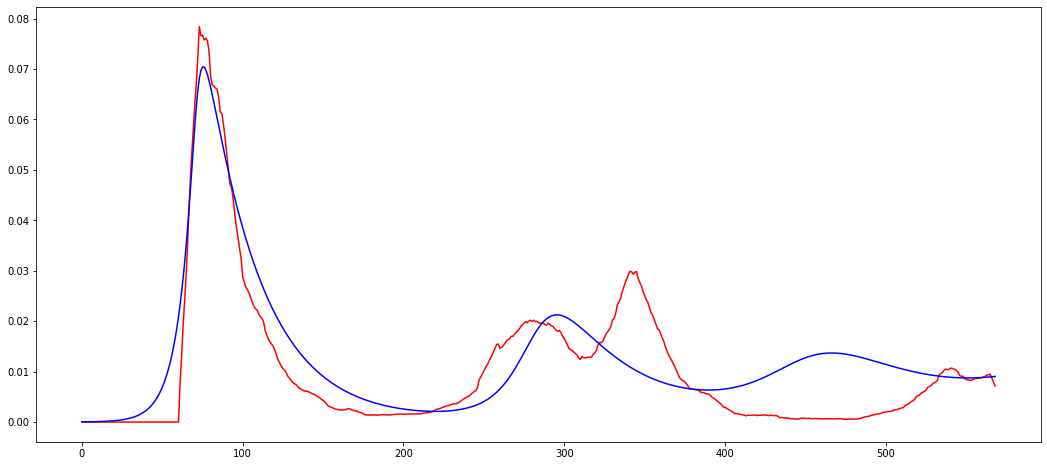

In [41]:
gradDesc.x = gradDesc.simulate(gradDesc.params) #to ensure sim data is set if solve vars func was broken

ukVars = gradDesc.params

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(gradDesc.y, color="red")
ax.plot(gradDesc.x, color="blue")

<ipython-input-59-9a80b1327782>:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.diff(I+R+D)/I[:-1], color="red")
<ipython-input-59-9a80b1327782>:2: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.diff(I+R+D)/I[:-1], color="red")
<ipython-input-59-9a80b1327782>:4: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(np.diff(R+D)/I[:-1], color="green")


(0.0, 0.25)

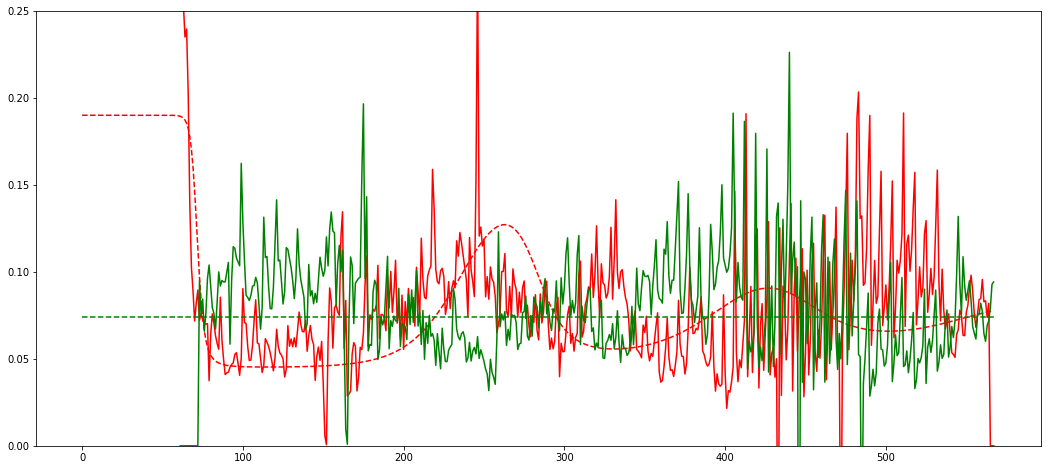

In [59]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(np.diff(I+R+D)/I[:-1], color="red")
ax.plot(  (np.diff(gradDesc.x) +  gradDesc.x[:-1]*(sird.getGamma(I,R)+sird.getNu(I,D)))/gradDesc.x[:-1], color="red", linestyle="dashed")
ax.plot(np.diff(R+D)/I[:-1], color="green")
ax.plot( np.ones(len(I))*(sird.getGamma(I,R)+sird.getNu(I,D)), color="green", linestyle="dashed" ) 

ax.set_ylim([0,.25])